In [1]:
%%capture
!pip install prophet
!pip install -U mlforecast
!pip install -U utilsforecast


In [2]:
!pip show prophet

Name: prophet
Version: 1.1.5
Summary: Automatic Forecasting Procedure
Home-page: 
Author: 
Author-email: "Sean J. Taylor" <sjtz@pm.me>, Ben Letham <bletham@fb.com>
License: MIT
Location: /Users/shibinhoo/miniconda3/envs/tabpfn-2/lib/python3.10/site-packages
Requires: cmdstanpy, holidays, importlib-resources, matplotlib, numpy, pandas, tqdm
Required-by: 


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from utilsforecast.plotting import plot_series

pd.plotting.register_matplotlib_converters()
plt.rc("figure", figsize=(10, 8))
plt.rc("font", size=10)

In [4]:
data_url = 'https://raw.githubusercontent.com/panambY/Hourly_Energy_Consumption/master/data/PJM_Load_hourly.csv'
df = pd.read_csv(data_url, parse_dates=['Datetime'])
df.columns = ['ds', 'y']
df.insert(0, 'unique_id', 'PJM_Load_hourly')
df['ds'] = pd.to_datetime(df['ds'])
df = df.sort_values(['unique_id', 'ds']).reset_index(drop=True)
print(f'Shape of the data {df.shape}')
df.tail()


Shape of the data (32896, 3)


,unique_id,ds,y
32891,PJM_Load_hourly,2001-12-31 20:00:00,36392.0
32892,PJM_Load_hourly,2001-12-31 21:00:00,35082.0
32893,PJM_Load_hourly,2001-12-31 22:00:00,33890.0
32894,PJM_Load_hourly,2001-12-31 23:00:00,32590.0
32895,PJM_Load_hourly,2002-01-01 00:00:00,31569.0


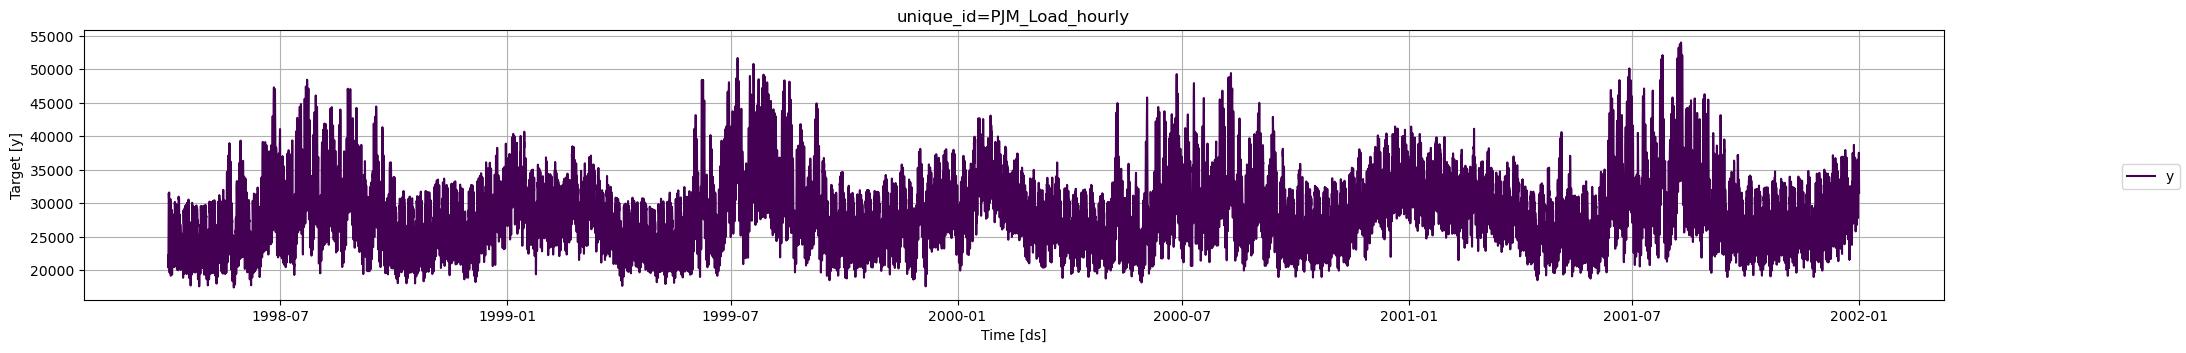

In [6]:
fig = plot_series(df)
fig